In [ ]:
import leapfrog1D as lp1
import leapfrog2D as lp2
import spectral1D as sp1
import spectral2D as sp2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#set dt for every value to 0.0001
lp1.dt = 0.0001
sp1.DT = 0.0001
lp2.dt = 0.0001
sp2.DT = 0.0001


step = 0
steps = 5000

record_step = [20, 100, 500, 900, 1200, 1500, 2000, 2500, 3000, 4000, 5000]

d1mean = []
d1std = []
d2mean = []
d2std = []

while step < steps + 1:
    lp1.leapfrog1D()
    sp1.spectral1D()
    lp2.leapfrog2D()
    sp2.spectral2D()
    psi_lp1 = lp1.psi_p
    psi_sp1 = sp1.psi
    psi_lp2 = lp2.psi_p
    psi_sp2 = sp2.psi
    if step in record_step:
        mean_dff1 = np.mean(np.abs(psi_lp1 - psi_sp1))
        std_dff1 = np.std(np.abs(psi_lp1 - psi_sp1))
        mean_dff2 = np.mean(np.abs(psi_lp2 - psi_sp2))
        std_dff2 = np.std(np.abs(psi_lp2 - psi_sp2))
        
        d1mean.append(mean_dff1)
        d2mean.append(mean_dff2)
        d1std.append(std_dff1)
        d2std.append(std_dff2)        
    step += 1 


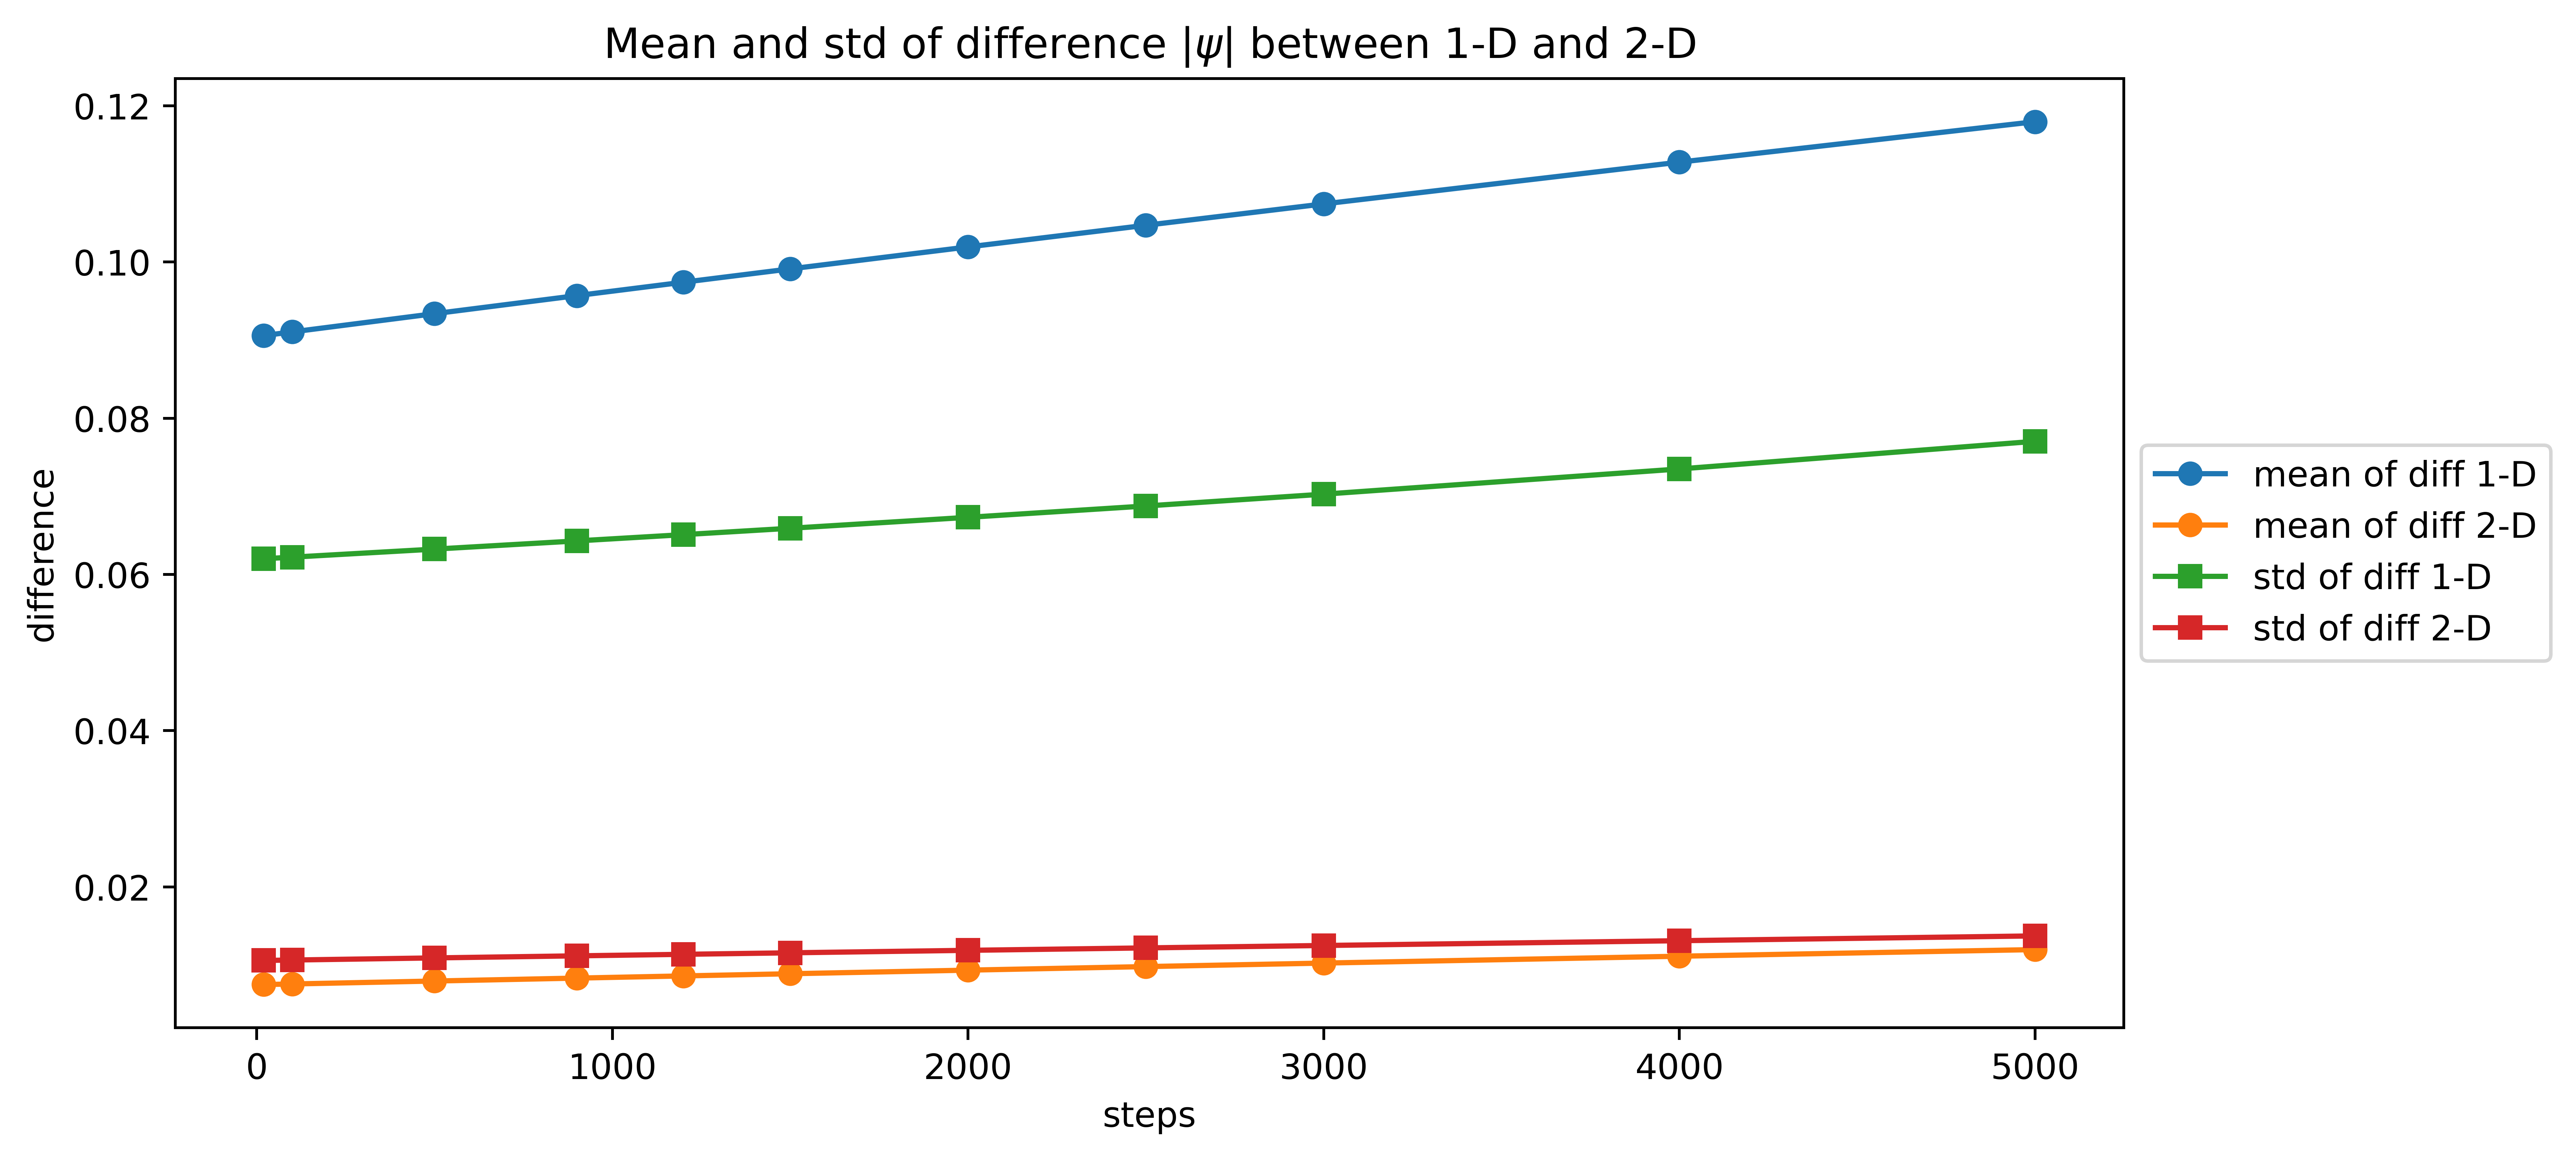

In [21]:
plt.figure(figsize=(10,5), dpi=720)
plt.plot(record_step, d1mean, label='mean of diff 1-D', marker='o')
plt.plot(record_step, d2mean, label='mean of diff 2-D', marker='o')
plt.plot(record_step, d1std, label='std of diff 1-D', marker='s')
plt.plot(record_step, d2std, label='std of diff 2-D', marker='s')
plt.title('Mean and std of difference |$\psi$| between 1-D and 2-D')
plt.xlabel('steps')
plt.ylabel('difference')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
